In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
plt.style.use('fivethirtyeight')
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')


from datetime import datetime
import dataframe_image as dfi
from statsmodels.tsa.seasonal import seasonal_decompose
import time
import glob
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.metrics import explained_variance_score, mean_squared_error, r2_score

In [2]:
%cd "/Users/brendan/Desktop/Python/Hustle Projects/Airbnb/"

/Users/brendan/Desktop/Python/Hustle Projects/Airbnb


In [4]:
# function to download all listings data
def get_listings_brussels_timeseries():
    """Function scraping all links to listings.csv files available on insideairbnb.com
    website, and saving downloaded files in a /data/raw-data folder.
    The files are named after their collection date (YYYY-MM.csv)."""
    soup = bs(requests.get('http://insideairbnb.com/get-the-data.html').content,'lxml')
    link_lst = [i['href'] for i in soup.select("td:contains('brussels')+td>a[onclick*=listings]")]
    subfolder_names = ['raw-data']
    for subfolder_name in subfolder_names:
        os.makedirs(os.path.join('data4',subfolder_name))
    for link in link_lst:
        file = pd.read_csv(link)
        date = re.findall(r'20\d{2}-\d{2}',link)[0]
        file.to_csv(f'data4/raw-data/brussels_{date}.csv',index=False)
get_listings_brussels_timeseries()

NameError: name 'bs' is not defined

In [3]:
# pull in detailed_listings
raw_df_brussels = pd.read_csv('/Users/brendan/Desktop/Python/Hustle Projects/Airbnb/data4/raw-data/brussels/brussels_detailed.csv')

print(f"The detailed listings dataset contains {len(raw_df_brussels)} AirBnb listings.")
#print(f"The most recent listings dataset contains {len(brussels_raw_df_11_4_2021)} Airbnb listings.")


The detailed listings dataset contains 5336 AirBnb listings.


In [4]:
brussels_raw_df_12_12_2020 = pd.read_csv('/Users/brendan/Desktop/Python/Hustle Projects/Airbnb/data4/raw-data/brussels/brussels_2020-12.csv')
brussels_raw_df_12_12_2020.shape


(5614, 16)

In [5]:
# use magic commands 'cd' to change directory
# use glob to locate all files for brussels
%cd "/Users/brendan/Desktop/Python/Hustle Projects/Airbnb/data1"
files_brussels = glob.glob('brussels/**.csv')
files_brussels

/Users/brendan/Desktop/Python/Hustle Projects/Airbnb/data1


['brussels/Brussels_2021-08.csv',
 'brussels/Brussels_2021-09.csv',
 'brussels/Brussels_2020-12.csv',
 'brussels/Brussels_2021-02.csv',
 'brussels/Brussels_2021-03.csv',
 'brussels/Brussels_2021-01.csv',
 'brussels/Brussels_2021-10.csv',
 'brussels/Brussels_2021-04.csv',
 'brussels/Brussels_2021-07.csv',
 'brussels/Brussels_2021-06.csv']

In [6]:
# create individual dataframes for each file
# summarize each file (# of listings; avg price in euro)

brussels_raw_df_12_12_2020 = pd.read_csv('/Users/brendan/Desktop/Python/Hustle Projects/Airbnb/data4/raw-data/brussels/brussels_2020-12.csv')
print(f"The 12_12_2020 dataset contains {len(brussels_raw_df_12_12_2020)} AirBnb listings; the avg price is €{round(brussels_raw_df_12_12_2020['price'].mean(),2)}.")

brussels_raw_df_1_9_2021 = pd.read_csv('/Users/brendan/Desktop/Python/Hustle Projects/Airbnb/data4/raw-data/brussels/brussels_2021-01.csv')
print(f"The 1_9_2021 dataset contains {len(brussels_raw_df_1_9_2021)} AirBnb listings; the avg price is €{round(brussels_raw_df_1_9_2021['price'].mean(),2)}.")

brussels_raw_df_2_8_2021 = pd.read_csv('/Users/brendan/Desktop/Python/Hustle Projects/Airbnb/data4/raw-data/brussels/brussels_2021-02.csv')
print(f"The 2_8_2021 dataset contains {len(brussels_raw_df_2_8_2021)} AirBnb listings; the avg price is €{round(brussels_raw_df_2_8_2021['price'].mean(),2)}.")

brussels_raw_df_3_4_2021 = pd.read_csv('/Users/brendan/Desktop/Python/Hustle Projects/Airbnb/data4/raw-data/brussels/brussels_2021-03.csv')
print(f"The 3_4_2021 dataset contains {len(brussels_raw_df_3_4_2021)} AirBnb listings; the avg price is €{round(brussels_raw_df_3_4_2021['price'].mean(),2)}.")

brussels_raw_df_4_9_2021 = pd.read_csv('/Users/brendan/Desktop/Python/Hustle Projects/Airbnb/data4/raw-data/brussels/brussels_2021-04.csv')
print(f"The 4_9_2021 dataset contains {len(brussels_raw_df_4_9_2021)} AirBnb listings; the avg price is €{round(brussels_raw_df_4_9_2021['price'].mean(),2)}.")

#brussels_raw_df_5_19_2021 = pd.read_csv('/Users/brendan/Desktop/Python/Hustle Projects/Airbnb/data4/raw-data/brussels/brussels_2021-05.csv')
#print(f"The 5_19_2021 dataset contains {len(brussels_raw_df_5_19_2021)} AirBnb listings; the avg price is €{round(brussels_raw_df_5_19_2021['price'].mean(),2)}.")

brussels_raw_df_6_3_2021 = pd.read_csv('/Users/brendan/Desktop/Python/Hustle Projects/Airbnb/data4/raw-data/brussels/brussels_2021-06.csv')
print(f"The 6_3_2021 dataset contains {len(brussels_raw_df_6_3_2021)} AirBnb listings; the avg price is €{round(brussels_raw_df_6_3_2021['price'].mean(),2)}.")

brussels_raw_df_7_4_2021 = pd.read_csv('/Users/brendan/Desktop/Python/Hustle Projects/Airbnb/data4/raw-data/brussels/brussels_2021-07.csv')
print(f"The 7_4_2021 dataset contains {len(brussels_raw_df_7_4_2021)} AirBnb listings; the avg price is €{round(brussels_raw_df_7_4_2021['price'].mean(),2)}.")

brussels_raw_df_8_6_2021 = pd.read_csv('/Users/brendan/Desktop/Python/Hustle Projects/Airbnb/data4/raw-data/brussels/brussels_2021-08.csv')
print(f"The 8_6_2021 dataset contains {len(brussels_raw_df_8_6_2021)} AirBnb listings; the avg price is €{round(brussels_raw_df_8_6_2021['price'].mean(),2)}.")

brussels_raw_df_9_7_2021 = pd.read_csv('/Users/brendan/Desktop/Python/Hustle Projects/Airbnb/data4/raw-data/brussels/brussels_2021-09.csv')
print(f"The 9_7_2021 dataset contains {len(brussels_raw_df_9_7_2021)} AirBnb listings; the avg price is €{round(brussels_raw_df_9_7_2021['price'].mean(),2)}.")

brussels_raw_df_10_6_2021 = pd.read_csv('/Users/brendan/Desktop/Python/Hustle Projects/Airbnb/data4/raw-data/brussels/brussels_2021-10.csv')
print(f"The 10_6_2021 dataset contains {len(brussels_raw_df_10_6_2021)} AirBnb listings; the avg price is €{round(brussels_raw_df_10_6_2021['price'].mean(),2)}.")

#brussels_raw_df_11_4_2021 = pd.read_csv('/Users/brendan/Desktop/Python/Hustle Projects/Airbnb/data4/raw-data/brussels/brussels_2021-11.csv')
#print(f"The 11_4_2021 dataset contains {len(brussels_raw_df_11_4_2021)} AirBnb listings; the avg price is €{round(brussels_raw_df_11_4_2021['price'].mean(),2)}.")


The 12_12_2020 dataset contains 5614 AirBnb listings; the avg price is €82.81.
The 1_9_2021 dataset contains 5557 AirBnb listings; the avg price is €77.53.
The 2_8_2021 dataset contains 5507 AirBnb listings; the avg price is €79.5.
The 3_4_2021 dataset contains 5453 AirBnb listings; the avg price is €79.04.
The 4_9_2021 dataset contains 5537 AirBnb listings; the avg price is €79.75.
The 6_3_2021 dataset contains 5642 AirBnb listings; the avg price is €84.2.
The 7_4_2021 dataset contains 5718 AirBnb listings; the avg price is €83.65.
The 8_6_2021 dataset contains 5531 AirBnb listings; the avg price is €85.18.
The 9_7_2021 dataset contains 5443 AirBnb listings; the avg price is €87.12.
The 10_6_2021 dataset contains 5336 AirBnb listings; the avg price is €90.94.


In [7]:
df_list_brussels = [brussels_raw_df_12_12_2020, brussels_raw_df_1_9_2021, brussels_raw_df_2_8_2021,
           brussels_raw_df_3_4_2021, brussels_raw_df_4_9_2021, brussels_raw_df_6_3_2021, brussels_raw_df_7_4_2021,
           brussels_raw_df_8_6_2021, brussels_raw_df_9_7_2021, brussels_raw_df_10_6_2021]

dates_brussels = ['12_12_2020', '01_9_2021', '02_08_2021','03_04_2021', '04_09_2021',
        '06_03_2021', '07_04_2021', '08_06_2021', '09_07_2021', '10_06_2021']

files_brussels = ['2020-12', '2021-01', '2021-02', '2021-03', '2021-04',  '2021-06', '2021-07', '2021-08',
                  '2021-09', '2021-10']


df_final_brussels = []

def airbnb_parse_brussels(df_list, files):
    for file in files_brussels:
        df_file = pd.read_csv(f"/Users/brendan/Desktop/Python/Two Sigma Projects/Airbnb/data1/brussels/brussels_{file}.csv")
        print(f"The {file} brussels dataset contains {len(df_file)} AirBnb listings -- the avg price is €{round(df_file['price'].mean(),2)}.")
        #print(f"The avg price per night out of {len(df_file)} listings is  ${round(df_file['price'].mean(),2)}.")


def airbnb_to_frame_brussels(df_list, dates):
    for file in files_brussels:
        df_file = pd.read_csv(f"/Users/brendan/Desktop/Python/Two Sigma Projects/Airbnb/data1/brussels/brussels_{file}.csv")
        #print(f"The {date} Paris dataset contains {len(df_file)} AirBnb listings -- the avg price is ${round(df_file['price'].mean(),2)}.")
        df_final_brussels.append(
        {
            'Date of scrape': file.replace('_', '/'),
            '# of Listings': len(df_file),
            'Avg Price': round(df_file['price'].mean(),2),
            'Median Price': round(df_file['price'].median(),2),
            'Min Price': df_file['price'].min(),
            'Max Price': df_file['price'].max(),
            'Avg reviews per month': round(df_file['reviews_per_month'].mean(),2)
        })
    
    return pd.DataFrame(df_final_brussels)

brussels_parse = airbnb_parse_brussels(df_list_brussels, files_brussels)


The 2020-12 brussels dataset contains 5614 AirBnb listings -- the avg price is €82.81.
The 2021-01 brussels dataset contains 5557 AirBnb listings -- the avg price is €77.53.
The 2021-02 brussels dataset contains 5507 AirBnb listings -- the avg price is €79.5.
The 2021-03 brussels dataset contains 5453 AirBnb listings -- the avg price is €79.04.
The 2021-04 brussels dataset contains 5537 AirBnb listings -- the avg price is €79.75.
The 2021-06 brussels dataset contains 5642 AirBnb listings -- the avg price is €84.2.
The 2021-07 brussels dataset contains 5718 AirBnb listings -- the avg price is €83.65.
The 2021-08 brussels dataset contains 5531 AirBnb listings -- the avg price is €85.18.
The 2021-09 brussels dataset contains 5443 AirBnb listings -- the avg price is €87.12.
The 2021-10 brussels dataset contains 5336 AirBnb listings -- the avg price is €90.94.


In [8]:
brussels_summary = airbnb_to_frame_brussels(df_list_brussels, files_brussels)
brussels_summary['Date of scrape'] = pd.to_datetime(brussels_summary['Date of scrape'])
brussels_summary['City'] = 'Brussels'

dfi.export(brussels_summary,"/Users/brendan/Desktop/Python/Hustle Projects/Airbnb/data4/raw-data/brussels/airbnb_brussels_summary.png")


In [9]:
master_df_brussels = pd.concat(df_list_brussels)
master_df_brussels_unique = master_df_brussels.drop_duplicates(subset='id')
master_df_brussels_unique.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license
0,2352,"Triplex-2chmbrs,grande sdb,terrasse= tous confort",2582,Oda,NaN,Molenbeek-Saint-Jean,50.85787,4.30809,Entire home/apt,93,2,16,2020-07-12,0.20,2,179,NaN,NaN
1,2354,COURT/Long- 1chmb+1salon+sdd+terras,2582,Oda,NaN,Molenbeek-Saint-Jean,50.85697,4.30651,Entire home/apt,74,2,2,2018-10-28,0.04,2,337,NaN,NaN
2,45145,B&B Welcome to my place - 2,199370,Erick,NaN,Bruxelles,50.85181,4.36801,Hotel room,120,1,3,2019-04-08,0.02,2,227,NaN,NaN
3,48180,Top Apart/location 0 default 2rooms,219560,Ahmet,NaN,Woluwe-Saint-Pierre,50.83821,4.40683,Entire home/apt,200,2,0,NaN,NaN,1,365,NaN,NaN
4,52796,Bright apartment in Ixelles/Louise,244722,Pierre,NaN,Ixelles,50.83356,4.36027,Entire home/apt,74,5,105,2020-02-28,0.87,1,363,NaN,NaN


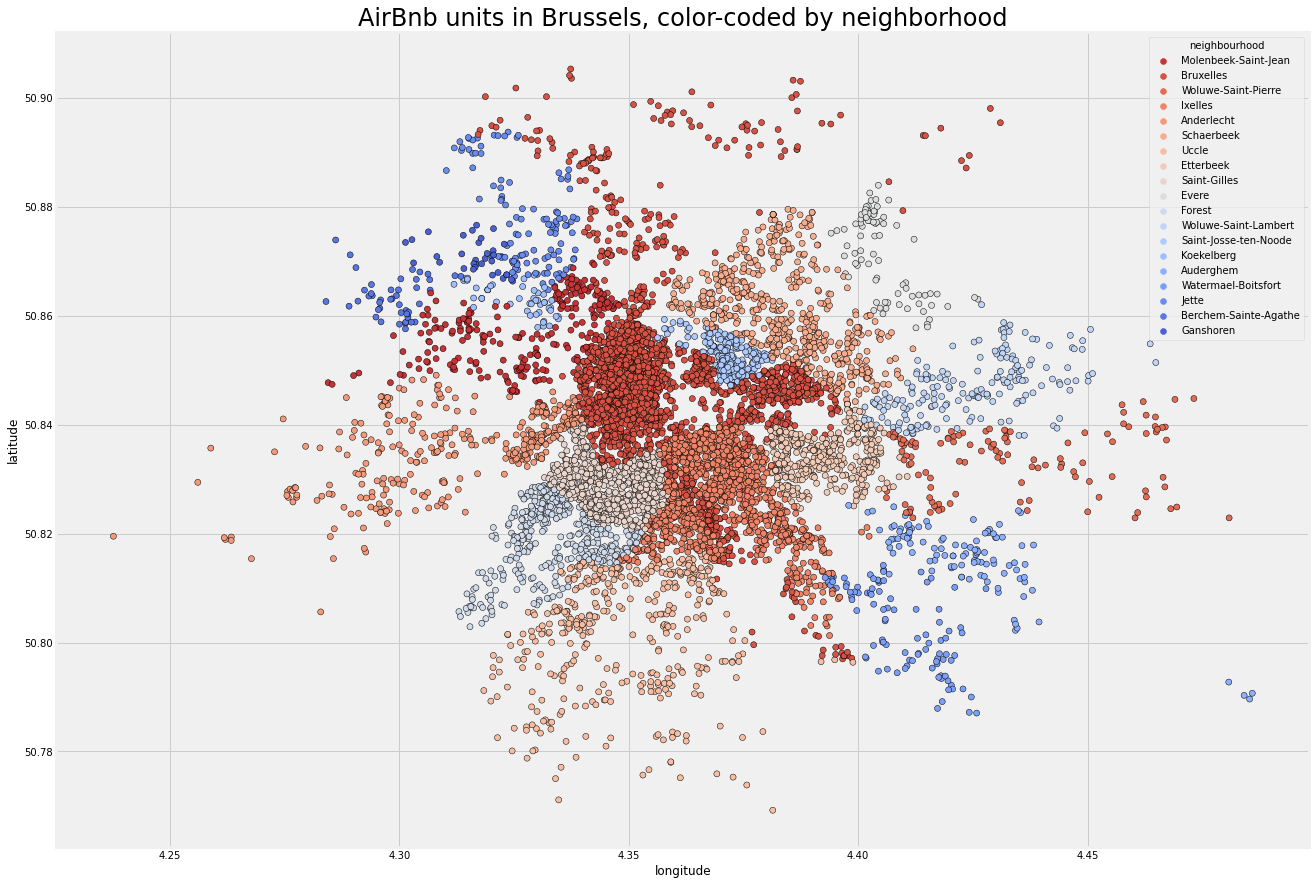

In [10]:
title = 'AirBnb units in Brussels, color-coded by neighborhood'
plt.figure(figsize=(20,15))
#sns.set_palette("Paired_r")
sns.scatterplot(master_df_brussels_unique.longitude, master_df_brussels_unique.latitude, hue = master_df_brussels_unique.neighbourhood, palette='coolwarm_r', edgecolor='black').set_title(title, fontsize=24)
plt.savefig('/Users/brendan/Desktop/Python/Hustle Projects/Airbnb/data4/raw-data/brussels/airbnb_brussels_map.png')
plt.show()

## Add review data through a join

In [11]:
df_reviews = pd.concat([brussels_raw_df_10_6_2021,raw_df_brussels],axis=1, join='outer')
df_reviews_ = df_reviews.loc[:,~df_reviews.columns.duplicated()]
df_reviews_ = df_reviews_[df_reviews_['accommodates'] <=6]
df_reviews_['accommodates'].value_counts()

2    2551
4    1122
1     515
3     452
6     346
5     170
0       3
Name: accommodates, dtype: int64

## Regression

In [12]:
#df_reviews_.columns

In [13]:
df_regression = df_reviews_.copy()
df_regression_ = df_regression[['id', 'property_type', 'room_type', 'accommodates',
                               'bedrooms', 'beds', 'price', 'availability_90','review_scores_rating',
                               'review_scores_accuracy','review_scores_cleanliness','review_scores_location',
                               'review_scores_value']]
df_regression_ = df_regression_[df_regression_['beds'].notna()]
df_regression_ = df_regression_[df_regression_['bedrooms'].notna()]
df_regression_['price'] = pd.to_numeric(df_regression_['price'])
df_regression_.isna().sum()

df_regression_=df_regression_.fillna(df_regression_.mean())

In [14]:
X_ = df_regression_[['accommodates', 'bedrooms','beds',
        'availability_90','review_scores_rating','review_scores_accuracy','review_scores_cleanliness','review_scores_location',
                               'review_scores_value']]

y = df_regression_['price'].replace({'\$':''}, regex = True)
Y = y.replace({',':''}, regex=True)

# with sklearn
regr = LinearRegression()
regr.fit(X_, Y)

print('Intercept: ', regr.intercept_)
print('Coefficients: ', regr.coef_)

print (regr)

Intercept:  -22.921137432998393
Coefficients:  [20.91582734  4.24443536  0.39756071  0.70441306 -3.06330358 -6.28099669
  5.58174673 16.60840304 -9.30151478]
LinearRegression()


In [15]:
y_pred2 = regr.predict(X_)

In [16]:
df_mult= pd.DataFrame({'Actual': Y, 'Predicted': y_pred2.flatten()})
df_mult['Diff'] = df_mult['Predicted'] - df_mult['Actual']
df_mult_sort = df_mult.sort_values(by=['Diff'])
df_result = (df_mult_sort[df_mult_sort['Actual'] >=25])
#df_result = df_mult_sort.query('Actual >= 75 & Actual <= 400')


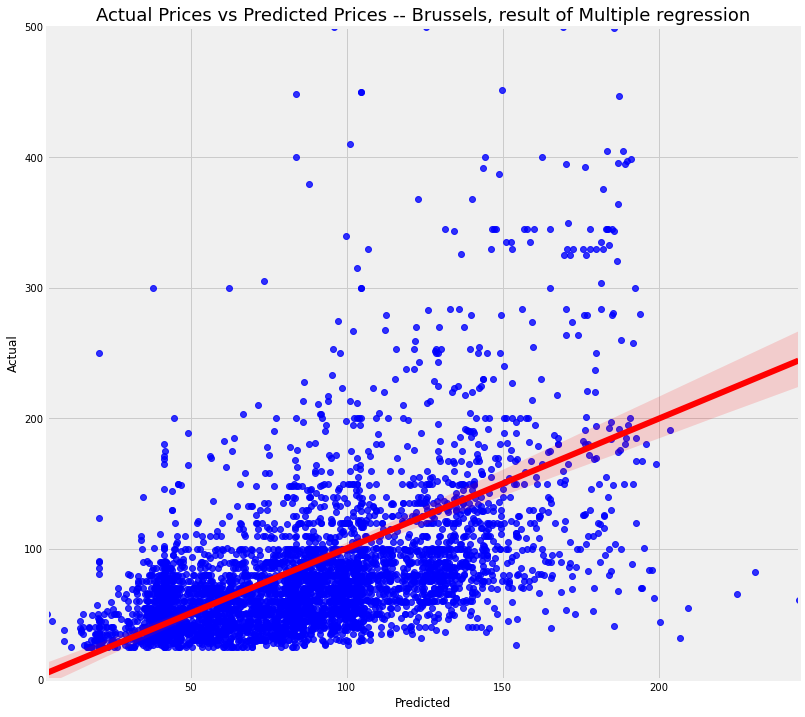

In [17]:
x = df_result['Predicted']
y = df_result['Actual']
fig = plt.figure(figsize=(12,12))
plt.title('Actual Prices vs Predicted Prices -- Brussels, result of Multiple regression', fontsize=18)
plt.xlabel('Predicted €')
plt.ylabel('Actual €')
plt.ylim([0,500])
ax = sns.regplot(x,y, data=df_result,  scatter_kws={"color": "blue"}, line_kws={"color": "red"})
ax.figure.savefig('/Users/brendan/Desktop/Python/Hustle Projects/Airbnb/data4/raw-data/brussels/airbnb_brussels_multiple_regression.png')



In [18]:
df_result.shape

(4348, 3)

## The most mispriced [undervalued]

In [19]:
brussels_mispriced = df_result.sort_values(by=['Diff'], ascending=False)
brussels_mispriced['%'] = (brussels_mispriced['Actual']/ brussels_mispriced['Predicted'] -1) *100
brussels_mispriced_perc = brussels_mispriced.sort_values(by=['%'], ascending=True)
brussels_mispriced_perc_plot = brussels_mispriced_perc.loc[(brussels_mispriced_perc['Predicted']>=1) & (brussels_mispriced_perc['Diff']>= 1)]
brussels_mispriced_perc_plot = brussels_mispriced_perc_plot.sort_values(by=['%'],ascending=True)
brussels_mispriced_perc_plot.head()
                                                             
                                                   

,Actual,Predicted,Diff,%
5042,32,206.883460,174.883460,-84.532355
2367,26,154.289599,128.289599,-83.148572
504,44,200.423795,156.423795,-78.046519
4762,41,185.796475,144.796475,-77.932843
2090,39,165.607304,126.607304,-76.450314


In [21]:

brussels_mispriced_1 = raw_df_brussels.loc[raw_df_brussels.id==827]
brussels_mispriced_2 = raw_df_brussels.loc[raw_df_brussels.id==748]
brussels_mispriced_3 = raw_df_brussels.loc[raw_df_brussels.index==1308]
brussels_mispriced_4 = raw_df_brussels.loc[raw_df_brussels.index==1748]
brussels_mispriced_5 = raw_df_brussels.loc[raw_df_brussels.index==894]

In [20]:
id_array = [5042, 2367, 504, 4762, 2090]

brussels_mispriced_query = raw_df_brussels.query('index in @id_array')
brussels_mispriced_query = brussels_mispriced_query.rename({'index': 'id'}, axis=1)
brussels_mispriced_query.shape
#brussels_mispriced_query.head(1)

(5, 74)

In [21]:
#brussels_mispriced_neg = raw_df_brussels.loc[raw_df_brussels.index==4119]
brussels_mispriced_perc_1 = raw_df_brussels.loc[raw_df_brussels.id==7125]
brussels_mispriced_perc_2 = raw_df_brussels.loc[raw_df_brussels.id==3679]
brussels_mispriced_perc_3 = raw_df_brussels.loc[raw_df_brussels.id==8267]
brussels_mispriced_perc_4 = raw_df_brussels.loc[raw_df_brussels.id==2483]
brussels_mispriced_perc_5 = raw_df_brussels.loc[raw_df_brussels.id==3449]

In [22]:
brussels_mispriced = brussels_mispriced_query[['id','price','review_scores_rating', 'review_scores_accuracy',
       'review_scores_cleanliness',
       'review_scores_communication', 'review_scores_location',
       'review_scores_value','neighbourhood','listing_url']]
brussels_mispriced_1 = brussels_mispriced.rename({'review_scores_rating':'rating',
                                                    'review_scores_accuracy':'accuracy',
                                                    'review_scores_cleanliness':'cleanliness',
                                                    'review_scores_communication':'communication',
                                                    'review_scores_location':'location',
                                                    'review_scores_value':'value'}, axis=1)

brussels_mispriced_1[:1]
brussels_mispriced_1[:2]
brussels_mispriced_1[:3]
brussels_mispriced_1[:4]
brussels_mispriced_1[:5]

,id,price,rating,accuracy,cleanliness,communication,location,value,neighbourhood,listing_url
504,6372996,$44.00,2.33,2.50,2.83,3.33,3.50,2.33,NaN,https://www.airbnb.com/rooms/6372996
2090,28602629,$39.00,4.50,4.61,4.67,4.85,4.74,4.58,"Brussel, Brussels Hoofdstedelijk Gewest, Belgium",https://www.airbnb.com/rooms/28602629
2367,32372061,$26.00,3.00,1.00,3.00,3.00,5.00,3.00,NaN,https://www.airbnb.com/rooms/32372061
4762,50888787,$41.00,3.89,4.00,3.44,4.44,4.33,3.89,NaN,https://www.airbnb.com/rooms/50888787
5042,52105458,$32.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,https://www.airbnb.com/rooms/52105458


In [23]:
dfi.export(brussels_mispriced_1,"/Users/brendan/Desktop/Python/Hustle Projects/Airbnb/data4/raw-data/brussels/airbnb_brussels_mispriced.png")



## The best score

In [24]:
brussels_high_value = df_result.sort_values(by=['Predicted'], ascending=False)
brussels_high_value.head(6)

,Actual,Predicted,Diff
3538,61,244.841851,183.841851
3928,82,231.018630,149.018630
751,65,225.034694,160.034694
734,55,209.243964,154.243964
679,800,208.063381,-591.936619
5042,32,206.883460,174.883460


In [25]:
id_array = [3528, 3928, 751, 734, 679]

brussels_best_score_query = raw_df_brussels.query('index in @id_array')
brussels_best_score_query = brussels_best_score_query.rename({'index': 'id'}, axis=1)
#brussels_best_score_query.head(1)

In [26]:
brussels_best_score = brussels_best_score_query[['id','price','review_scores_rating', 'review_scores_accuracy',
       'review_scores_cleanliness',
       'review_scores_communication', 'review_scores_location',
       'review_scores_value','neighbourhood','listing_url']]
brussels_best_score_1 = brussels_best_score.rename({'review_scores_rating':'rating',
                                                    'review_scores_accuracy':'accuracy',
                                                    'review_scores_cleanliness':'cleanliness',
                                                    'review_scores_communication':'communication',
                                                    'review_scores_location':'location',
                                                    'review_scores_value':'value'}, axis=1)

brussels_best_score_1[:1]
brussels_best_score_1[:2]
brussels_best_score_1[:3]
brussels_best_score_1[:4]
brussels_best_score_1[:5]

,id,price,rating,accuracy,cleanliness,communication,location,value,neighbourhood,listing_url
679,8585748,$800.00,4.00,4.00,3.67,4.67,5.00,3.67,"Bruxelles, Belgium",https://www.airbnb.com/rooms/8585748
734,9588103,$55.00,3.25,3.50,4.75,3.75,4.00,3.00,NaN,https://www.airbnb.com/rooms/9588103
751,9839493,$65.00,2.67,2.00,3.00,3.67,4.67,2.33,"Ixelles, Bruxelles, Belgium",https://www.airbnb.com/rooms/9839493
3528,42409908,$95.00,5.00,4.67,4.67,5.00,4.33,5.00,"Schaarbeek, Brussels Hoofdstedelijk Gewest, Belgium",https://www.airbnb.com/rooms/42409908
3928,45327781,$82.00,4.14,4.57,4.29,4.00,5.00,4.57,NaN,https://www.airbnb.com/rooms/45327781


In [27]:
dfi.export(brussels_best_score_1,"/Users/brendan/Desktop/Python/Hustle Projects/Airbnb/data4/raw-data/brussels/airbnb_brussels_best_score.png")


